<a href="https://colab.research.google.com/github/LizVallejos1/Examen3_354/blob/main/pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pregunta 1: Realice el cálculo de la media, moda, cuartiles de datos y de percentiles por columna
#sin numpy ni pandas

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
datos=pd.read_csv('/gdrive/MyDrive/diabetes.csv')

In [ ]:
print(datos)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
# 1: Ordenar los datos por la columna 'Age'
datos_ordenados = sorted(datos['Age'])
print(datos_ordenados)

[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,

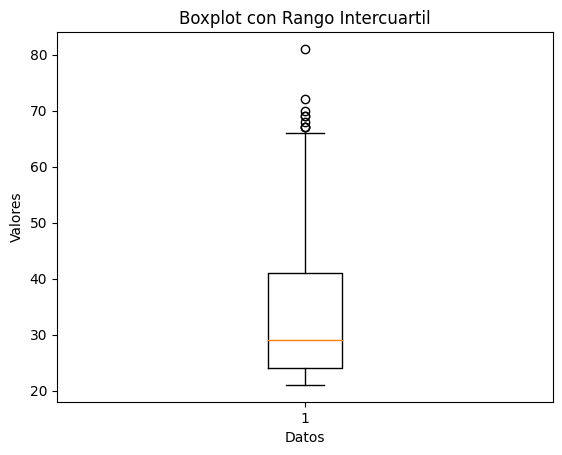

In [ ]:
#  2: Calcular el rango intercuartil
Q1 = datos_ordenados[int(len(datos_ordenados)*0.25)]#1cuartil , separa 25%
Q3 = datos_ordenados[int(len(datos_ordenados)*0.75)]#3cuartil,separa 75%
IQR = Q3 - Q1#rangointercualrtil, medida de dispersion, describe amplitud de la dispersion de datos

# Crea un boxplot
plt.boxplot(datos_ordenados)
plt.title('Boxplot con Rango Intercuartil')
plt.ylabel('Valores')
plt.xlabel('Datos')
plt.show()

In [ ]:
# 3: Calcular el porcentaje de datos que se encuentran por debajo del percentil 90
p = (len(datos_ordenados)-1)*0.9 + 1
print(p)

691.3000000000001


In [ ]:
# 4: Interpolar el valor del percentil 90 en los datos ordenados
def interpolar_percentil(datos_ordenados, p):
    if p % 1 == 0:
        # Si el porcentaje es un número entero, el percentil corresponde a un valor en los datos ordenados
        Percentil = datos_ordenados[int(p)-1]
    else:
        # Si el porcentaje no es un número entero, se interpola el valor
        i = int(p) - 1
        d = p % 1
        Percentil = datos_ordenados[i] + d * (datos_ordenados[i+1] - datos_ordenados[i])
    return Percentil


In [ ]:
  print("El percentil 90 de la columna 'Age' es:", Percentil)

El percentil 90 de la columna 'Age' es: 51.0


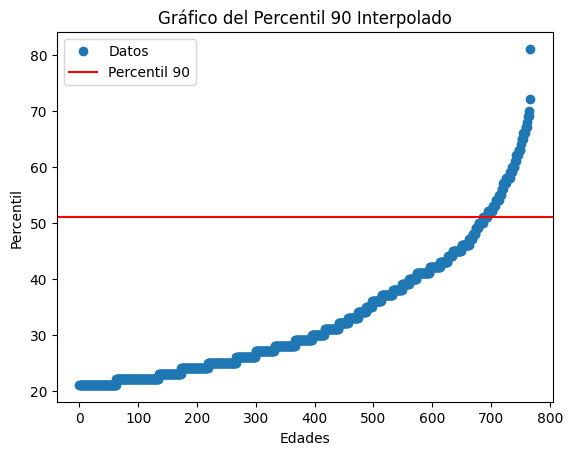

In [ ]:
#grficado
# Graficar los datos y el percentil interpolado
plt.plot(datos_ordenados, 'o', label='Datos')
plt.axhline(y=Percentil, color='r', linestyle='-', label=f'Percentil {p}')
plt.legend()
plt.title(f'Gráfico del Percentil {p} Interpolado')
plt.xlabel('Edades')
plt.ylabel('Percentil')
plt.show()

In [ ]:
# Definimos la columna que queremos calcular la media
mdatos = datos['Age']
print(mdatos)

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64


In [ ]:
# Calculamos la suma de los valores en la columna
suma = np.int64(0)
for elemento in mdatos:
    suma =suma + elemento
# Calculamos el número total de valores en la columna
num_valores = len(mdatos)
# Calculamos la media de los valores en la columna
media = suma / num_valores
print("La media de la columna es:", media)

La media de la columna es: 33.240885416666664


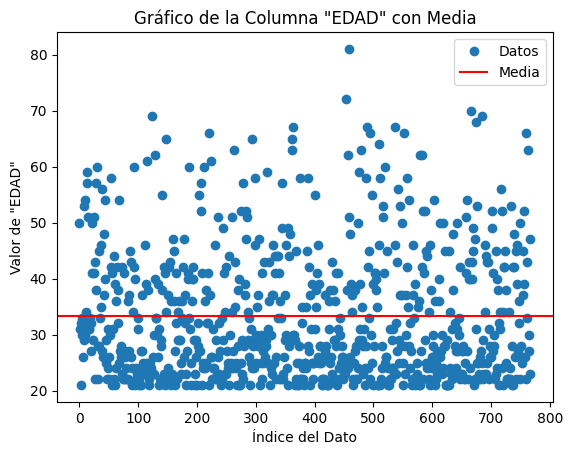

In [ ]:
# Graficar los datos y la línea de la media
plt.plot(mdatos, 'o', label='Datos')
plt.axhline(y=media, color='r', linestyle='-', label='Media')
plt.legend()
plt.title('Gráfico de la Columna "EDAD" con Media')
plt.xlabel('Índice del Dato')
plt.ylabel('Valor de "EDAD"')
plt.show()



In [ ]:
#Moda de la columna Age
columna = datos['Age'].tolist()
frecuencias = {}
for valor in columna:
    if valor not in frecuencias:
        frecuencias[valor] = 1
    else:
        frecuencias[valor] += 1


moda = None
frecuencia_maxima = 0
for valor, frecuencia in frecuencias.items():
    if frecuencia > frecuencia_maxima:
        moda = valor
        frecuencia_maxima = frecuencia

print('La moda de la columna es:', moda)


La moda de la columna es: 22


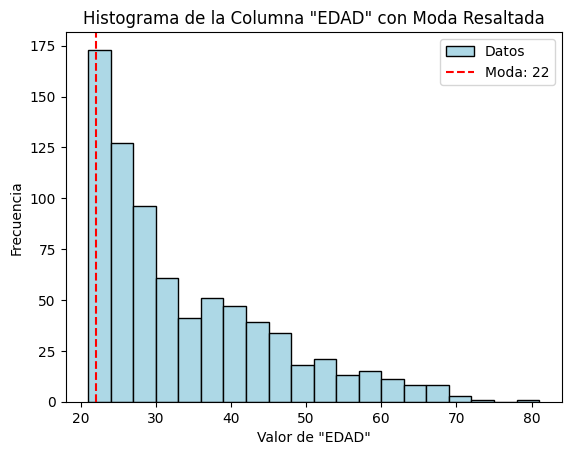

In [ ]:
# Graficar los datos y resaltar la moda
plt.hist(columna, bins=20, color='lightblue', edgecolor='black', label='Datos')
plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
plt.legend()
plt.title('Histograma de la Columna "EDAD" con Moda Resaltada')
plt.xlabel('Valor de "EDAD"')
plt.ylabel('Frecuencia')
plt.show()